In [8]:
import pandas as pd

# Using a relative path to read the CSV file
csv_file_path = './pi4b_standard_9.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Group by label and count the occurrences
count_by_label = df['label'].value_counts()

# Group by label and calculate mean for all other columns
mean_by_label = df.groupby('label').mean()

# Group by label and calculate standard deviation for all other columns
std_by_label = df.groupby('label').std()

# Display the results
print(f"Count by label:\n{count_by_label}\n")
print(f"Mean by label:\n{mean_by_label}\n")
print(f"Standard Deviation by label:\n{std_by_label}\n")


Count by label:
label
 6    71
 2    70
 4    70
 8    70
 5    70
 7    70
 0    68
 1    68
 3    68
-1     5
Name: count, dtype: int64

Mean by label:
        sdram_freq  cpu_cores     cpu_freq   avg_fps  total_time  mem_limit_kb
label                                                                         
-1     2760.000000   3.600000  1500.000000  3.012000   11.536000  3.670016e+05
 0     2597.058824   4.000000  1036.764706  7.192794    1.911029  2.621440e+05
 1     2597.058824   4.000000  1036.764706  7.208676    1.904412  5.242880e+05
 2     2600.000000   4.000000  1050.000000  7.228571    1.900857  1.048576e+06
 3     2600.000000   2.000000  1036.764706  0.443382   33.075000  2.621440e+05
 4     2600.000000   2.000000  1050.000000  0.468143   31.798857  5.242880e+05
 5     2600.000000   1.000000  1050.000000  0.249286   57.094714  2.621440e+05
 6     2594.366197   1.014085  1056.338028  0.249859   56.926197  5.205958e+05
 7     2600.000000   1.000000  1050.000000  0.248714   5

In [13]:
# Remove rows where label is 1
df_filtered = df[df['label'] != -1]

# Save the new DataFrame to a new CSV file
new_csv_file_path = './pi4b_standard_9_filtered.csv'
df_filtered.to_csv(new_csv_file_path, index=False)

# Output message to indicate successful saving
print(f"Filtered data saved to {new_csv_file_path}")

Filtered data saved to ./pi4b_standard_9_filtered.csv


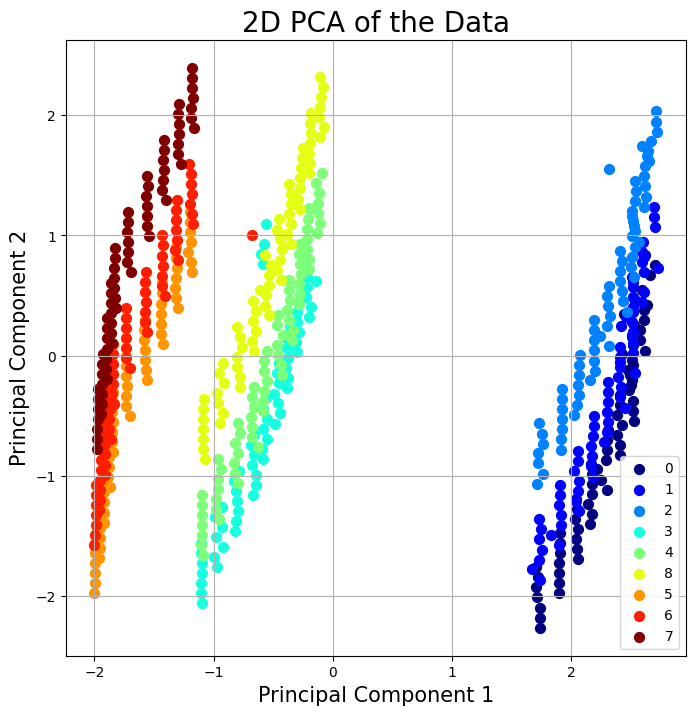

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Using a relative path to read the CSV file
csv_file_path = './pi4b_standard_9_filtered.csv'

# Load the data into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print("The file was not found at the specified path.")

# Use StandardScaler for preprocessing
scaler = StandardScaler()
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
df_scaled = scaler.fit_transform(df[features])

# Apply PCA and reduce dimensions to 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Add the label for coloring
finalDf = pd.concat([principalDf, df[['label']]], axis=1)

# Plot 2D PCA result
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA of the Data', fontsize=20)

labels = list(finalDf['label'].unique())
colors = plt.cm.jet(np.linspace(0, 1, len(labels)))  # Generating as many distinct colors as there are labels
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c=[color]
               , s=50)
ax.legend(labels)
ax.grid()

# Save the plot
plt.savefig('./2D_PCA_plot_standard.png')

plt.show()




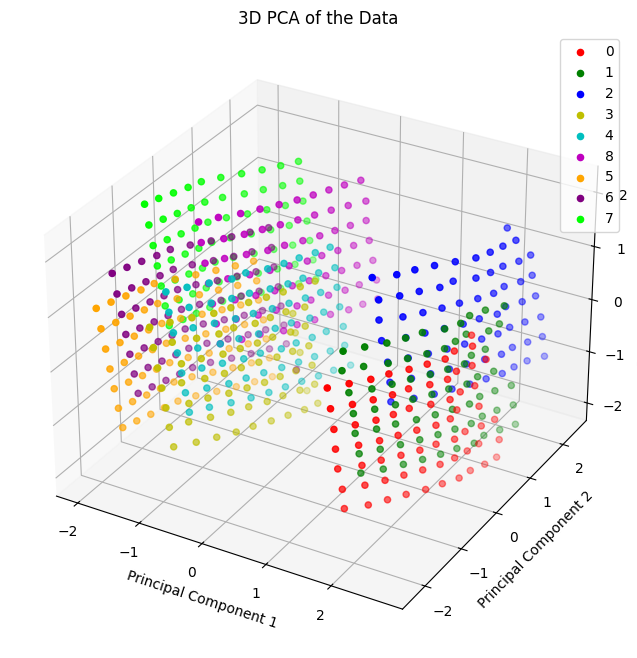

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data
try:
    df = pd.read_csv('./pi4b_standard_9_filtered.csv')
except FileNotFoundError:
    print("File not found")

# Use StandardScaler for preprocessing
scaler = StandardScaler()
features = ['sdram_freq', 'cpu_cores', 'cpu_freq', 'avg_fps', 'total_time', 'mem_limit_kb']
x = df.loc[:, features]
x = scaler.fit_transform(x)

# Apply PCA for 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3'])

# Concatenating DataFrame along axis=1. finalDf is the final DataFrame before plotting the data
finalDf = pd.concat([principalDf, df[['label']]], axis=1)

# Visualize the data in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of the Data')

labels = list(finalDf['label'].unique())
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'lime']
for label, color in zip(labels, colors):
    indicesToKeep = finalDf['label'] == label
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c=color)

ax.legend(labels)

# Save the plot
plt.savefig('./3D_PCA_plot_9clusters.png')

plt.show()
